# Madrigal FPI Analysis

### Merging Pre-Processed Data (Temperatures and Unprocessed Wind Speeds), and the Post-Processed Data (Easterly Wind Speeds)

In [ ]:
import sys
from pathlib import Path

%load_ext autoreload
%autoreload 2

# Define the root path
root_path = '/Users/elliotdable/Documents/PhD/research/fpi_ml/'  # Adjust as needed
sys.path.append(str(root_path))

In [2]:
from src.madrigal import madrigal_fpi_reader, run_msis_specific_location

- Arecibo (2016) (2021-2022)
- Brazil (2020) (2021-2022)
- Millstone Hill (2010) (2021-2022)
- CCORE (2021-2022)
- Arequipa (2012-2013) (deprecated)
- Jicamarca (2017) (deprecated)
- Columns differ for the last two, where they don't have these column values: 'range', 'geodetic_altitdude', 'max_altitude', 'min_altitude', 'magnetic_local_time'

In [3]:
dir = '/Users/elliotdable/Documents/UCL/research/fpi_ml/new_data'
zonal_winds, meridional_winds, temps = madrigal_fpi_reader(dir)

/Users/elliotdable/Documents/UCL/research/fpi_ml/new_data/millstone_hill
5792 files found.
/Users/elliotdable/Documents/UCL/research/fpi_ml/new_data/caocheira_paulista
3351 files found.
/Users/elliotdable/Documents/UCL/research/fpi_ml/new_data/arecibo
2279 files found.
/Users/elliotdable/Documents/UCL/research/fpi_ml/new_data/ccore
1121 files found.


In [4]:
import pandas as pd
import numpy as np
import os
import h5py

location_winds = pd.DataFrame() 
files = os.listdir(dir)
hdf5_files = [file for file in files if file.endswith('hdf5')]
print(f'{len(hdf5_files)} files found.')

# Iterate over each CSV file and append it to the end of the concatenated location_winds
for file in hdf5_files:
    filepath = os.path.join(dir, file)
    hdf5_file = h5py.File(filepath, 'r')
    dataset = hdf5_file['Data/Table Layout'][:]
    df_post_processed = pd.DataFrame(dataset)
    hdf5_file.close()


    location_winds = pd.concat([location_winds, df_post_processed])

location_winds

3351 files found.


,year,month,day,hour,min,sec,recno,kindat,kinst,ut1_unix,...,ap3,ap,f10.7,fbar,tn,dtn,vn1,dvn1,vn2,dvn2
0,2024,4,21,22,26,24,0,7100,5362,1.713738e+09,...,15.0,18.0,2.170000e-20,1.723000e-20,1502.716,11.260,NaN,NaN,NaN,NaN
1,2024,4,21,22,42,0,1,7100,5362,1.713739e+09,...,15.0,18.0,2.170000e-20,1.723000e-20,1512.269,12.355,NaN,NaN,NaN,NaN
2,2024,4,21,22,54,36,2,7100,5362,1.713740e+09,...,15.0,18.0,2.170000e-20,1.723000e-20,1499.005,12.625,NaN,NaN,NaN,NaN
3,2024,4,21,23,6,0,3,7100,5362,1.713741e+09,...,15.0,18.0,2.170000e-20,1.723000e-20,1454.114,9.800,NaN,NaN,NaN,NaN
4,2024,4,21,23,10,48,4,7100,5362,1.713741e+09,...,15.0,18.0,2.170000e-20,1.723000e-20,1501.267,13.310,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2021,9,1,8,27,0,213,7100,5362,1.630485e+09,...,4.0,4.0,8.400000e-21,8.270000e-21,824.056,33.183,NaN,NaN,NaN,NaN
214,2021,9,1,8,29,24,214,7100,5362,1.630485e+09,...,4.0,4.0,8.400000e-21,8.270000e-21,781.784,30.322,NaN,NaN,NaN,NaN
215,2021,9,1,8,31,48,215,7100,5362,1.630485e+09,...,4.0,4.0,8.400000e-21,8.270000e-21,772.761,28.796,NaN,NaN,NaN,NaN
216,2021,9,1,8,34,12,216,7100,5362,1.630485e+09,...,4.0,4.0,8.400000e-21,8.270000e-21,845.804,27.062,NaN,NaN,NaN,NaN


In [8]:
temps

,datetime,year,month,day,hour,solar_local_time,hour_local,magnetic_local_time,site_name,min_altitude,...,solar_zenith_angle,kp,dst,f10.7,multiday_f10.7,ap_3_hour,ap_daily,multiday_f10.7,temperature,temperature_error
0,2020-01-01 00:49:03,2020,1,1,0,20.063333,20,20.162311,millstone_hill,172.5,...,127.265915,0.3,-6.0,7.200000e-21,7.160000e-21,2.0,2.0,7.160000e-21,859.331,50.874
1,2020-01-01 00:51:27,2020,1,1,0,20.103333,20,20.213876,millstone_hill,172.5,...,127.614517,0.3,-6.0,7.200000e-21,7.160000e-21,2.0,2.0,7.160000e-21,793.031,57.266
2,2020-01-01 00:53:15,2020,1,1,0,20.298372,20,20.451852,millstone_hill,172.5,...,129.858887,0.3,-6.0,7.200000e-21,7.160000e-21,2.0,2.0,7.160000e-21,812.098,42.835
3,2020-01-01 01:00:27,2020,1,1,1,20.253333,20,20.364070,millstone_hill,172.5,...,129.360428,0.3,0.0,7.200000e-21,7.160000e-21,2.0,2.0,7.160000e-21,911.901,61.814
4,2020-01-01 01:09:27,2020,1,1,1,20.238292,20,20.304428,millstone_hill,172.5,...,129.195953,0.3,0.0,7.200000e-21,7.160000e-21,2.0,2.0,7.160000e-21,811.379,61.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2023-08-06 09:11:36,2023,8,6,9,4.856211,5,5.153721,ccore,172.5,...,100.851723,0.0,-33.0,1.740000e-20,1.619000e-20,0.0,2.0,1.619000e-20,1073.901,11.468
191,2023-08-06 09:14:00,2023,8,6,9,5.024383,5,5.329230,ccore,172.5,...,99.327583,0.0,-33.0,1.740000e-20,1.619000e-20,0.0,2.0,1.619000e-20,1070.627,10.443
192,2023-08-06 09:16:24,2023,8,6,9,4.936211,5,5.195805,ccore,172.5,...,101.165825,0.0,-33.0,1.740000e-20,1.619000e-20,0.0,2.0,1.619000e-20,1064.330,13.343
193,2023-08-06 09:18:48,2023,8,6,9,4.848042,5,5.101555,ccore,172.5,...,101.661263,0.0,-33.0,1.740000e-20,1.619000e-20,0.0,2.0,1.619000e-20,1051.129,16.200


In [5]:
msis_data = run_msis_specific_location(temps)

k_b = 1.38e-23
R = 8.3145

densities = pd.merge(temps, msis_data, on='datetime', how='left')
densities = densities.astype({col: 'float64' for col in densities.select_dtypes(include=['float32']).columns})

molar_masses = [0.028, 0.032, 0.016, 4e-3, 1.008e-3, 0.03995, 0.014, 0.016, 0.03]
densities['fpi_density'] = sum(densities.iloc[:, i+20] * molar_masses[i-1] for i in range(1, 10))*((k_b*densities['msis_temperature'])/(R*densities['temperature']))
densities = densities.drop(columns=['n2_density',
       'o2_density', 'o_density', 'he_density', 'h_density', 'ar_density',
       'n_density', 'anomalous_o_density', 'no_density'])

/Users/elliotdable/anaconda3/envs/research/lib/python3.12/site-packages/pymsis/utils.py:233: UserWarning: There is data that was either interpolated or predicted (not observed), use at your own risk.
  warnings.warn(


## Plotting

### By Hour

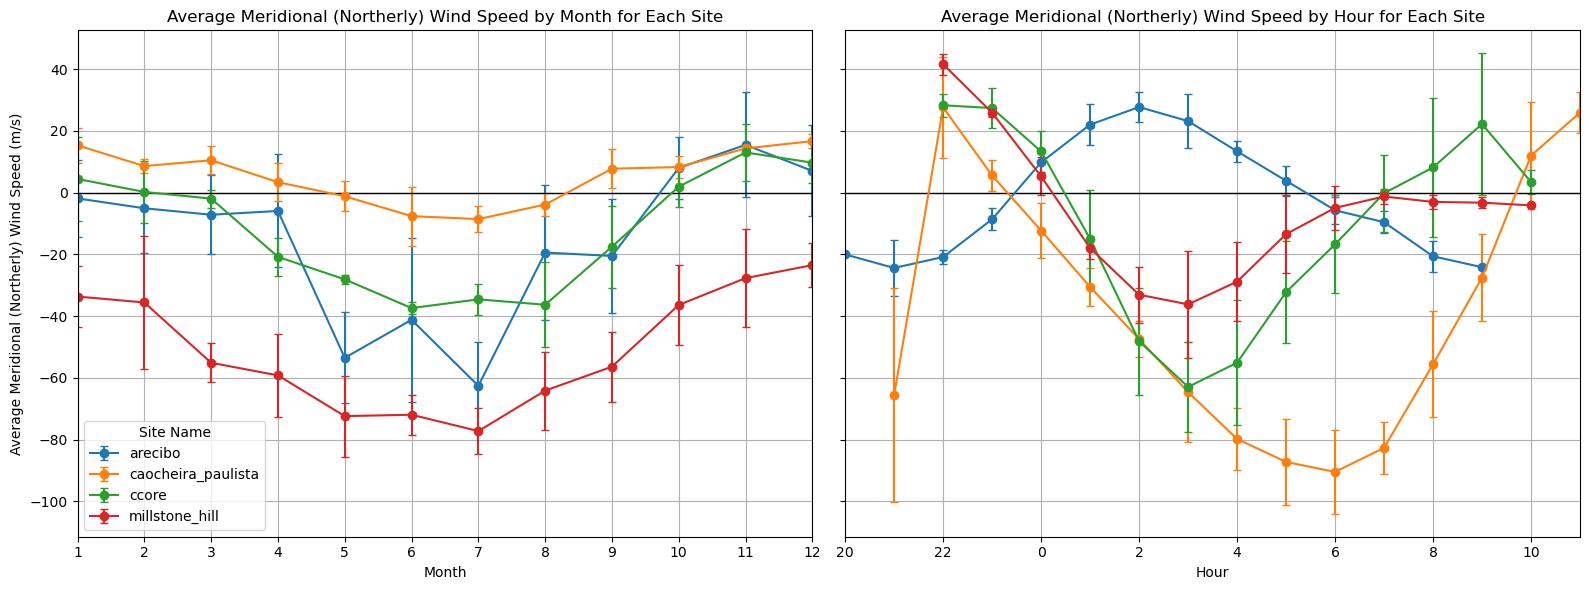

In [6]:
import matplotlib.pyplot as plt

# Ensure the 'month' column is numeric
meridional_winds['month'] = pd.to_numeric(meridional_winds['month'], errors='coerce')

# Group by 'month' and 'site_name', then calculate the mean for 'meridional_wind_speed' and 'mws_error'
grouped_month = meridional_winds.groupby(['month', 'site_name']).agg(
    meridional_wind_speed_mean=('meridional_wind_speed', 'mean'),
    mws_error_mean=('mws_error', 'mean'),
    mws_error_std=('mws_error', 'std')
).reset_index()

# Ensure the 'hour' column is numeric
meridional_winds['hour'] = pd.to_numeric(meridional_winds['hour'], errors='coerce')

# Adjust 'hour' if it is greater than 19
meridional_winds['hour'] = meridional_winds['hour'].apply(lambda x: x - 24 if x > 19 else x)

# Group by 'hour' and 'site_name', then calculate the mean for 'meridional_wind_speed' and 'mws_error'
grouped_hour = meridional_winds.groupby(['hour', 'site_name']).agg(
    meridional_wind_speed_mean=('meridional_wind_speed', 'mean'),
    mws_error_mean=('mws_error', 'mean'),
    mws_error_std=('mws_error', 'std')
).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot the monthly data
for site in grouped_month['site_name'].unique():
    site_data = grouped_month[grouped_month['site_name'] == site]
    axes[0].errorbar(site_data['month'], site_data['meridional_wind_speed_mean'], 
                     yerr=site_data['mws_error_std'], label=site, fmt='-o', capsize=3)

axes[0].set_title('Average Meridional (Northerly) Wind Speed by Month for Each Site')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Meridional (Northerly) Wind Speed (m/s)')
axes[0].grid(True)
axes[0].axhline(y=0, color='black', linewidth=1, linestyle='-')  # Horizontal line
axes[0].set_xlim(1, 12)
axes[0].set_xticks(range(1, 13))
axes[0].legend(title='Site Name')

# Plot the hourly data
for site in grouped_hour['site_name'].unique():
    site_data = grouped_hour[grouped_hour['site_name'] == site]
    axes[1].errorbar(site_data['hour'], site_data['meridional_wind_speed_mean'], 
                     yerr=site_data['mws_error_std'], label=site, fmt='-o', capsize=3)

axes[1].set_title('Average Meridional (Northerly) Wind Speed by Hour for Each Site')
axes[1].set_xlabel('Hour')
axes[1].grid(True)
axes[1].axhline(y=0, color='black', linewidth=1, linestyle='-')  # Horizontal line

# Adjust x-ticks and their labels for hourly plot
xticks = axes[1].get_xticks()
xticklabels = [str(int(tick) + 24) if tick < 0 else str(int(tick)) for tick in xticks]
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticklabels)
axes[1].set_xlim(-4, 11)

# Adjust layout
plt.tight_layout()
plt.show()

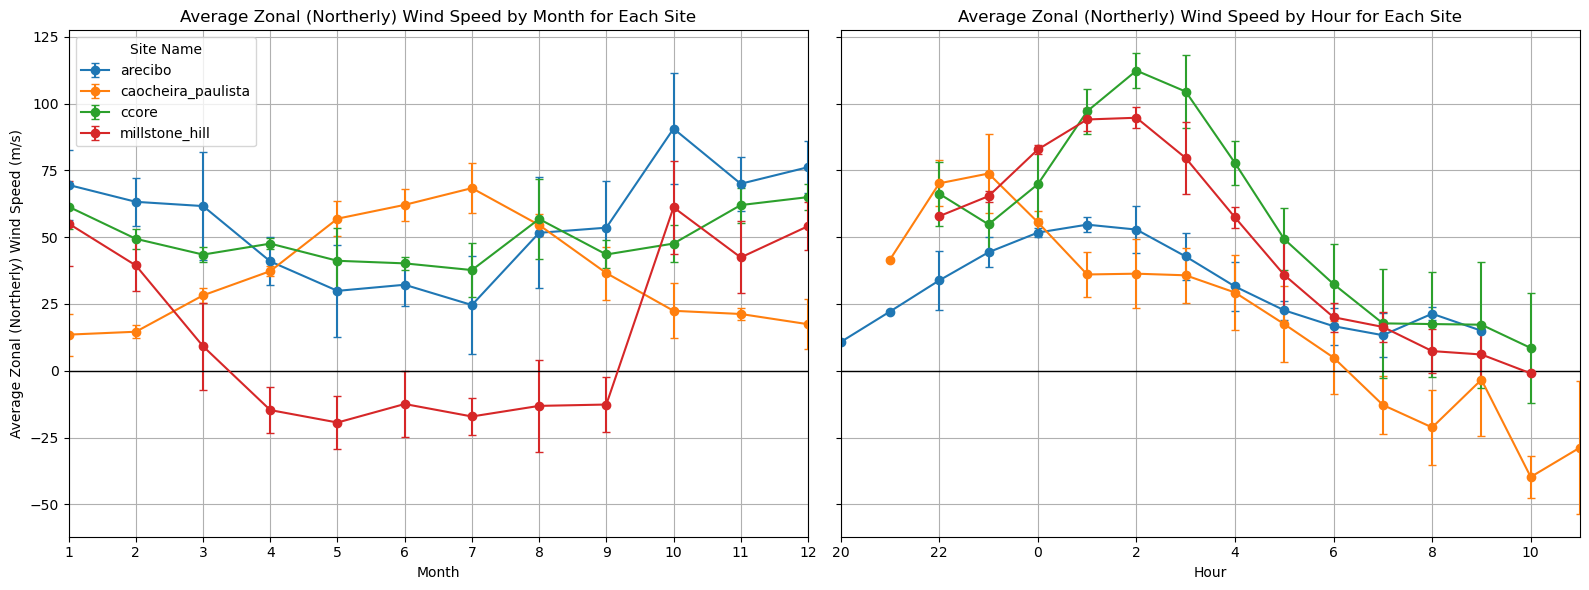

In [7]:
# Ensure the 'month' column is numeric
zonal_winds['month'] = pd.to_numeric(zonal_winds['month'], errors='coerce')

# Group by 'month' and 'site_name', then calculate the mean for 'zonal_wind_speed' and 'zws_error'
grouped_month = zonal_winds.groupby(['month', 'site_name']).agg(
    zonal_wind_speed_mean=('zonal_wind_speed', 'mean'),
    zws_error_mean=('zws_error', 'mean'),
    zws_error_std=('zws_error', 'std')
).reset_index()

# Ensure the 'hour' column is numeric
zonal_winds['hour'] = pd.to_numeric(zonal_winds['hour'], errors='coerce')

# Adjust 'hour' if it is greater than 19
zonal_winds['hour'] = zonal_winds['hour'].apply(lambda x: x - 24 if x > 19 else x)

# Group by 'hour' and 'site_name', then calculate the mean for 'zonal_wind_speed' and 'zws_error'
grouped_hour = zonal_winds.groupby(['hour', 'site_name']).agg(
    zonal_wind_speed_mean=('zonal_wind_speed', 'mean'),
    zws_error_mean=('zws_error', 'mean'),
    zws_error_std=('zws_error', 'std')
).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot the monthly data
for site in grouped_month['site_name'].unique():
    site_data = grouped_month[grouped_month['site_name'] == site]
    axes[0].errorbar(site_data['month'], site_data['zonal_wind_speed_mean'], 
                     yerr=site_data['zws_error_std'], label=site, fmt='-o', capsize=3)

axes[0].set_title('Average Zonal (Northerly) Wind Speed by Month for Each Site')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Zonal (Northerly) Wind Speed (m/s)')
axes[0].grid(True)
axes[0].axhline(y=0, color='black', linewidth=1, linestyle='-')  # Horizontal line
axes[0].set_xlim(1, 12)
axes[0].set_xticks(range(1, 13))
axes[0].legend(title='Site Name')

# Plot the hourly data
for site in grouped_hour['site_name'].unique():
    site_data = grouped_hour[grouped_hour['site_name'] == site]
    axes[1].errorbar(site_data['hour'], site_data['zonal_wind_speed_mean'], 
                     yerr=site_data['zws_error_std'], label=site, fmt='-o', capsize=3)

axes[1].set_title('Average Zonal (Northerly) Wind Speed by Hour for Each Site')
axes[1].set_xlabel('Hour')
axes[1].grid(True)
axes[1].axhline(y=0, color='black', linewidth=1, linestyle='-')  # Horizontal line

# Adjust x-ticks and their labels for hourly plot
xticks = axes[1].get_xticks()
xticklabels = [str(int(tick) + 24) if tick < 0 else str(int(tick)) for tick in xticks]
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticklabels)
axes[1].set_xlim(-4, 11)

# Adjust layout
plt.tight_layout()
plt.show()


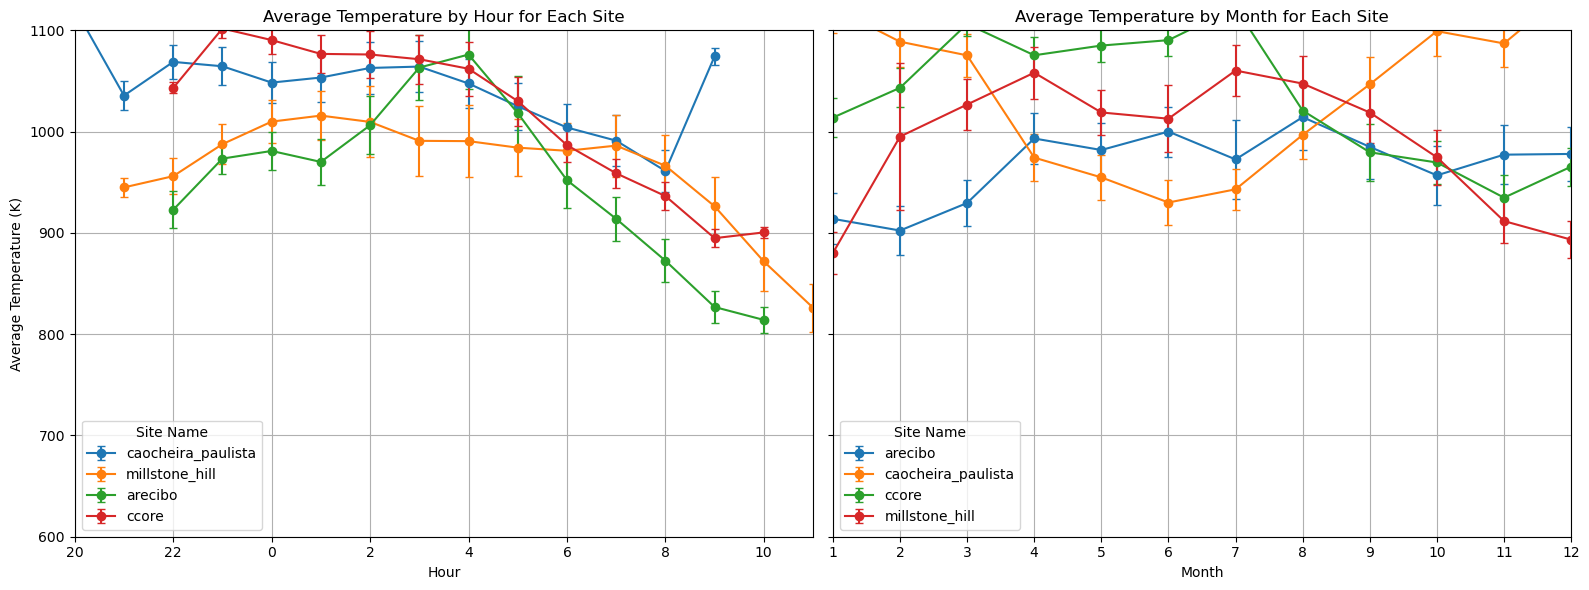

In [8]:
# Ensure the 'hour' column is numeric
temps['hour'] = pd.to_numeric(temps['hour'], errors='coerce')

# Adjust 'hour' if it is greater than 19
temps['hour'] = temps['hour'].apply(lambda x: x - 24 if x > 19 else x)

# Group by 'hour' and 'site_name', then calculate the mean for temperature and temperature_error
grouped_hour = temps.groupby(['hour', 'site_name']).agg(
    temperature_mean=('temperature', 'mean'),
    temperature_error_mean=('temperature_error', 'mean'),
    temperature_error_std=('temperature_error', 'std')
).reset_index()

# Ensure the 'month' column is numeric
temps['month'] = pd.to_numeric(temps['month'], errors='coerce')

# Adjust 'month' if it is greater than 19
temps['month'] = temps['month'].apply(lambda x: x - 24 if x > 19 else x)

# Group by 'month' and 'site_name', then calculate the mean for temperature and temperature_error
grouped_month = temps.groupby(['month', 'site_name']).agg(
    temperature_mean=('temperature', 'mean'),
    temperature_error_mean=('temperature_error', 'mean'),
    temperature_error_std=('temperature_error', 'std')
).reset_index()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot the hourly data
for site in grouped_hour['site_name'].unique():
    site_data = grouped_hour[grouped_hour['site_name'] == site]
    axes[0].errorbar(site_data['hour'], site_data['temperature_mean'], 
                     yerr=site_data['temperature_error_std'], label=site, 
                     fmt='-o', capsize=3)

axes[0].set_title('Average Temperature by Hour for Each Site')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Average Temperature (K)')
axes[0].grid(True)
axes[0].axhline(y=0, color='black', linewidth=1, linestyle='-')  # Horizontal line

# Adjust x-ticks and their labels for hourly plot
xticks = axes[0].get_xticks()
xticklabels = [str(int(tick) + 24) if tick < 0 else str(int(tick)) for tick in xticks]
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xticklabels)
axes[0].set_xlim(-4, 11)
axes[0].set_ylim(600, 1100)
axes[0].legend(title='Site Name')

# Plot the monthly data
for site in grouped_month['site_name'].unique():
    site_data = grouped_month[grouped_month['site_name'] == site]
    axes[1].errorbar(site_data['month'], site_data['temperature_mean'], 
                     yerr=site_data['temperature_error_std'], label=site, 
                     fmt='-o', capsize=3)

axes[1].set_title('Average Temperature by Month for Each Site')
axes[1].set_xlabel('Month')
axes[1].grid(True)
axes[1].axhline(y=0, color='black', linewidth=1, linestyle='-')  # Horizontal line
axes[1].set_xlim(1, 12)
axes[1].set_xticks(range(1, 13))
axes[1].set_ylim(600, 1100)
axes[1].legend(title='Site Name')

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
# Adjust 'hour_local' if it is greater than 19
zonal = zonal_winds.copy()
zonal['hour_local'] = zonal['hour_local'].apply(lambda x: x - 24 if x > 16 else x)
zonal = zonal[zonal['year'] >= 2021]
#zonal = zonal[zonal['dst'] <= -40]

# Adjust 'hour_local' if it is greater than 19
temperatures = temps.copy()
temperatures['hour_local'] = temperatures['hour_local'].apply(lambda x: x - 24 if x > 16 else x)
temperatures = temperatures[temperatures['year'] >= 2021]
#temperatures = temperatures[temperatures['dst'] <= -40]

# Adjust 'hour_local' if it is greater than 19
meridional = meridional_winds.copy()
meridional['hour_local'] = meridional['hour_local'].apply(lambda x: x - 24 if x > 16 else x)
meridional = meridional[meridional['year'] >= 2021]
#meridional = meridional[meridional['dst'] <= -40]

# Adjust 'hour_local' if it is greater than 19
density = densities.copy()
density['hour_local'] = density['hour_local'].apply(lambda x: x - 24 if x > 16 else x)
density = density[density['year'] >= 2021]
#meridional = meridional[meridional['dst'] <= -40]

# Define grouped_month and grouped_hour_local for Meridional Winds
grouped_month_meridional = meridional.groupby(['month', 'site_name']).agg(
    meridional_wind_speed_mean=('meridional_wind_speed', 'mean'),
    mws_error_mean=('mws_error', 'mean'),
    mws_error_std=('mws_error', 'std')
).reset_index()

grouped_hour_local_meridional = meridional.groupby(['hour_local', 'site_name']).agg(
    meridional_wind_speed_mean=('meridional_wind_speed', 'mean'),
    mws_error_mean=('mws_error', 'mean'),
    mws_error_std=('mws_error', 'std')
).reset_index()

# Define grouped_month and grouped_hour_local for Zonal Winds
grouped_month_zonal = zonal.groupby(['month', 'site_name']).agg(
    zonal_wind_speed_mean=('zonal_wind_speed', 'mean'),
    zws_error_mean=('zws_error', 'mean'),
    zws_error_std=('zws_error', 'std')
).reset_index()

grouped_hour_local_zonal = zonal.groupby(['hour_local', 'site_name']).agg(
    zonal_wind_speed_mean=('zonal_wind_speed', 'mean'),
    zws_error_mean=('zws_error', 'mean'),
    zws_error_std=('zws_error', 'std')
).reset_index()

# Define grouped_month and grouped_hour_local for Temperature
grouped_month_temp = temperatures.groupby(['month', 'site_name']).agg(
    temperature_mean=('temperature', 'mean'),
    temperature_error_mean=('temperature_error', 'mean'),
    temperature_error_std=('temperature_error', 'std')
).reset_index()

grouped_hour_local_temp = temperatures.groupby(['hour_local', 'site_name']).agg(
    temperature_mean=('temperature', 'mean'),
    temperature_error_mean=('temperature_error', 'mean'),
    temperature_error_std=('temperature_error', 'std')
).reset_index()

# Define grouped_month and grouped_hour_local for Temperature
grouped_month_density = density.groupby(['month', 'site_name']).agg(
    temperature_mean=('fpi_density', 'mean')
).reset_index()

grouped_hour_local_density = density.groupby(['hour_local', 'site_name']).agg(
    temperature_mean=('fpi_density', 'mean')
).reset_index()

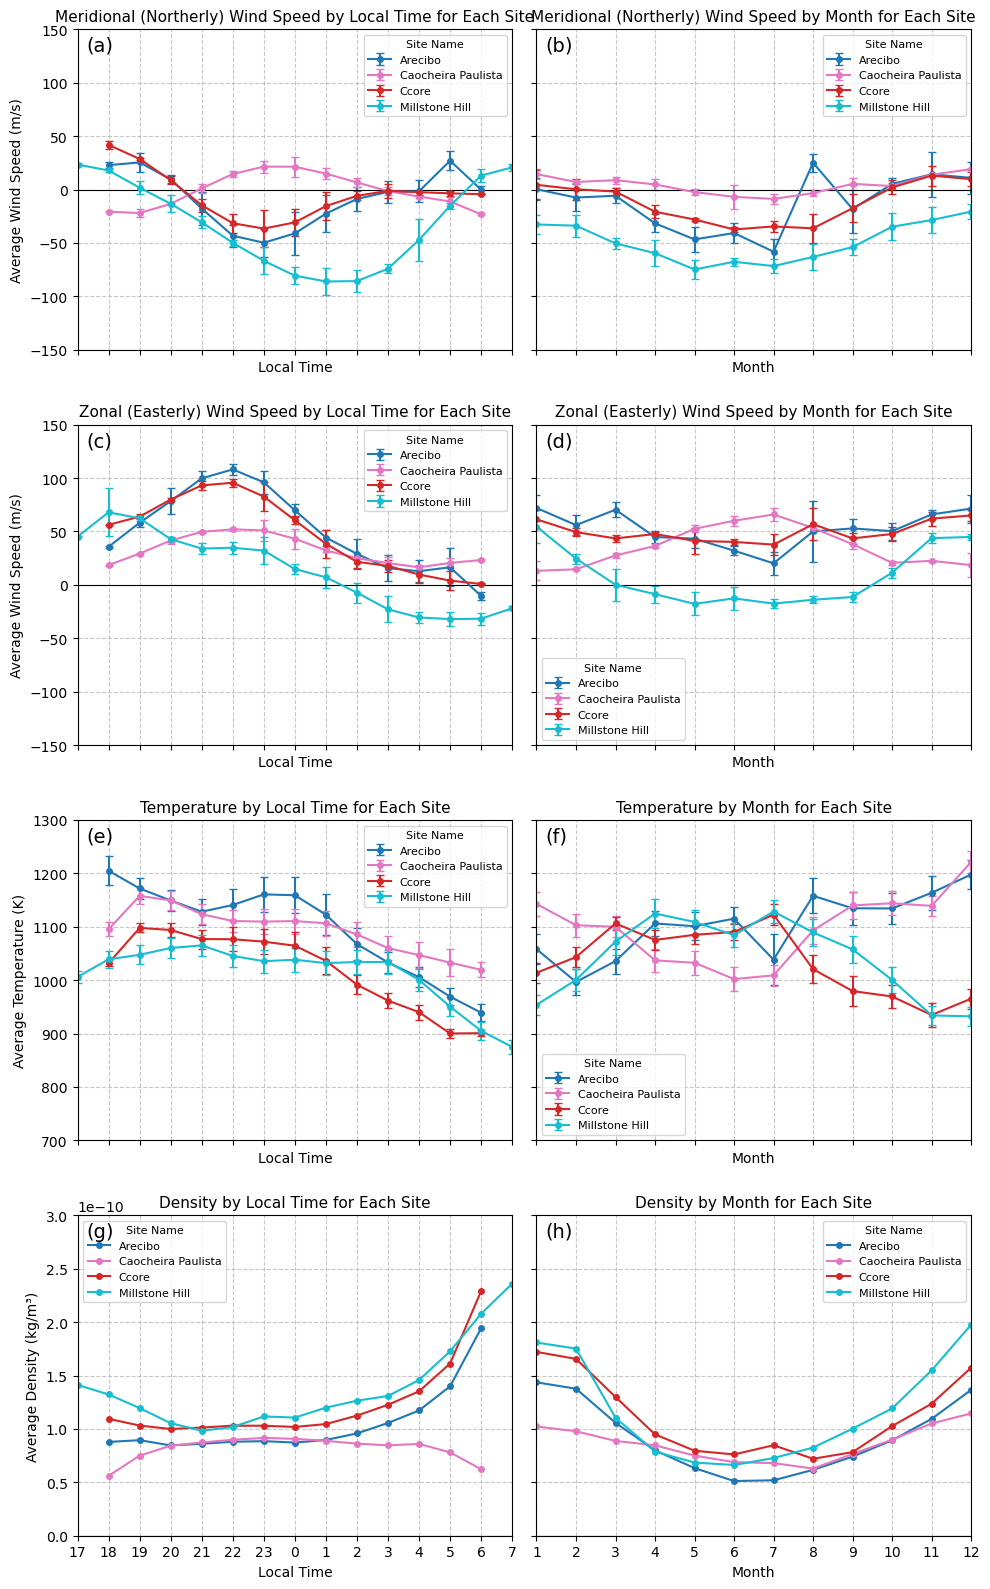

In [10]:
# Define a list of subplot labels
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']

# Create subplots with shared y-axis for each row
fig, axes = plt.subplots(4, 2, figsize=(10, 16), sharey='row')  # Adjust figure size for the extra row

# Define font sizes
title_fontsize = 11
label_fontsize = 10
tick_fontsize = 10
legend_fontsize = 8


# Create a color map for site names
all_sites = list(set(
    grouped_hour_local_meridional['site_name'].unique().tolist()
))
colors = plt.cm.tab10(np.linspace(0, 1, len(all_sites)))
color_map = dict(zip(all_sites, colors))

# Loop through rows for meridional winds, zonal winds, temperatures, and density
for i, (grouped_hour_local, grouped_month, title_prefix, y_label, ylim) in enumerate([
    (grouped_hour_local_meridional, grouped_month_meridional, 
     'Meridional (Northerly) Wind Speed', 'Average Wind Speed (m/s)', (-150, 150)),
    (grouped_hour_local_zonal, grouped_month_zonal, 
     'Zonal (Easterly) Wind Speed', 'Average Wind Speed (m/s)', (-150, 150)),
    (grouped_hour_local_temp, grouped_month_temp, 
     'Temperature', 'Average Temperature (K)', (700, 1300)),
    (grouped_hour_local_density, grouped_month_density,  # New density data
     'Density', 'Average Density (kg/m³)', (0, 3e-10))  # Adjust y-axis limits for density
]):
    
    # Hour_locally plot (left column)
    for site in sorted(grouped_hour_local['site_name'].unique()):
        site_data = grouped_hour_local[grouped_hour_local['site_name'] == site]
        
        # Skip error bars for density row
        if i == 3:  # Last row (density)
            axes[i, 0].errorbar(site_data['hour_local'], site_data.iloc[:, 2], 
                                label=str(site).replace('_', ' ').title(), fmt='-o', 
                                capsize=3, markersize=4, color=color_map[site])
        else:
            axes[i, 0].errorbar(site_data['hour_local'], site_data.iloc[:, 2], 
                                yerr=site_data.iloc[:, 4], label=str(site).replace('_', ' ').title(), fmt='-o', 
                                capsize=3, markersize=4, color=color_map[site])
    
    axes[i, 0].set_title(f'{title_prefix} by Local Time for Each Site', fontsize=title_fontsize)
    axes[i, 0].set_xlabel('Local Time', fontsize=label_fontsize)
    axes[i, 0].set_ylabel(y_label, fontsize=label_fontsize)
    axes[i, 0].grid(True, linestyle='--', alpha=0.7)
    axes[i, 0].axhline(y=0, color='black', linewidth=0.8, linestyle='-')
    axes[i, 0].set_ylim(*ylim)

    # Add subplot label
    axes[i, 0].text(0.02, 0.98, subplot_labels[i * 2], transform=axes[i, 0].transAxes,
                fontsize=14, va='top', ha='left', zorder=10)

    # Ensure x-ticks have an interval of 1 on the left axis (hour_locally plot)
    axes[i, 0].set_xticks(np.arange(min(grouped_hour_local.hour_local.value_counts().keys()), 
                                max(grouped_hour_local.hour_local.value_counts().keys()) + 1, 1))
    xticklabels = [str(int(tick) + 24) if tick < 0 else str(int(tick)) for tick in axes[i, 0].get_xticks()]
    axes[i, 0].set_xticklabels(xticklabels, fontsize=tick_fontsize)
    axes[i, 0].tick_params(axis='y', labelsize=tick_fontsize)
    axes[i, 0].set_xlim(min(grouped_hour_local.hour_local.value_counts().keys()), 
                        max(grouped_hour_local.hour_local.value_counts().keys()))

    # Hide x-tick labels for all but the last row
    if i != 3:
        axes[i, 0].tick_params(axis='x', labelbottom=False)
    
    axes[i, 0].legend(title='Site Name', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

    # Monthly plot (right column)
    for site in sorted(grouped_month['site_name'].unique()):
        site_data = grouped_month[grouped_month['site_name'] == site]
        
        # Skip error bars for density row
        if i == 3:  # Last row (density)
            axes[i, 1].errorbar(site_data['month'], site_data.iloc[:, 2], 
                                label=str(site).replace('_', ' ').title(), fmt='-o', 
                                capsize=3, markersize=4, color=color_map[site])
        else:
            axes[i, 1].errorbar(site_data['month'], site_data.iloc[:, 2], 
                                yerr=site_data.iloc[:, 4], label=str(site).replace('_', ' ').title(), fmt='-o', 
                                capsize=3, markersize=4, color=color_map[site])
    
    axes[i, 1].set_title(f'{title_prefix} by Month for Each Site', fontsize=title_fontsize)
    axes[i, 1].set_xlabel('Month', fontsize=label_fontsize)
    axes[i, 1].grid(True, linestyle='--', alpha=0.7)
    axes[i, 1].axhline(y=0, color='black', linewidth=0.8, linestyle='-')
    axes[i, 1].set_xlim(1, 12)
    axes[i, 1].set_ylim(*ylim)
    axes[i, 1].set_xticks(range(1, 13))
    axes[i, 1].tick_params(axis='both', labelsize=tick_fontsize)

    # Add subplot label
    axes[i, 1].text(0.02, 0.98, subplot_labels[i * 2 + 1], transform=axes[i, 1].transAxes,
                fontsize=14, va='top', ha='left', zorder=10)

    # Hide x-tick labels for all but the last row
    if i != 3:
        axes[i, 1].tick_params(axis='x', labelbottom=False)
    
    axes[i, 1].legend(title='Site Name', fontsize=legend_fontsize, title_fontsize=legend_fontsize)

# Adjust layout to avoid overlap
plt.tight_layout()

#plt.savefig('/Users/elliotdable/Documents/UCL/research/transfer_docs/transfer_report/plots/fpi_analysis/winds_temps_densities_time_averages_2021_2023.png', dpi=1000)

# Show the plot
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'densities_plot' is your dataframe
densities_plot = densities.copy()

/var/folders/pf/x6mn9jt96z14ybg9rxsvmb100000gn/T/ipykernel_19343/1637718209.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontsize=10)
/var/folders/pf/x6mn9jt96z14ybg9rxsvmb100000gn/T/ipykernel_19343/1637718209.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontsize=10)
/var/folders/pf/x6mn9jt96z14ybg9rxsvmb100000gn/T/ipykernel_19343/1637718209.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(xticklabels, fontsize=10)
/var/folders/pf/x6mn9jt96z14ybg9rxsvmb100000gn/T/ipykernel_19343/1637718209.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xtickl

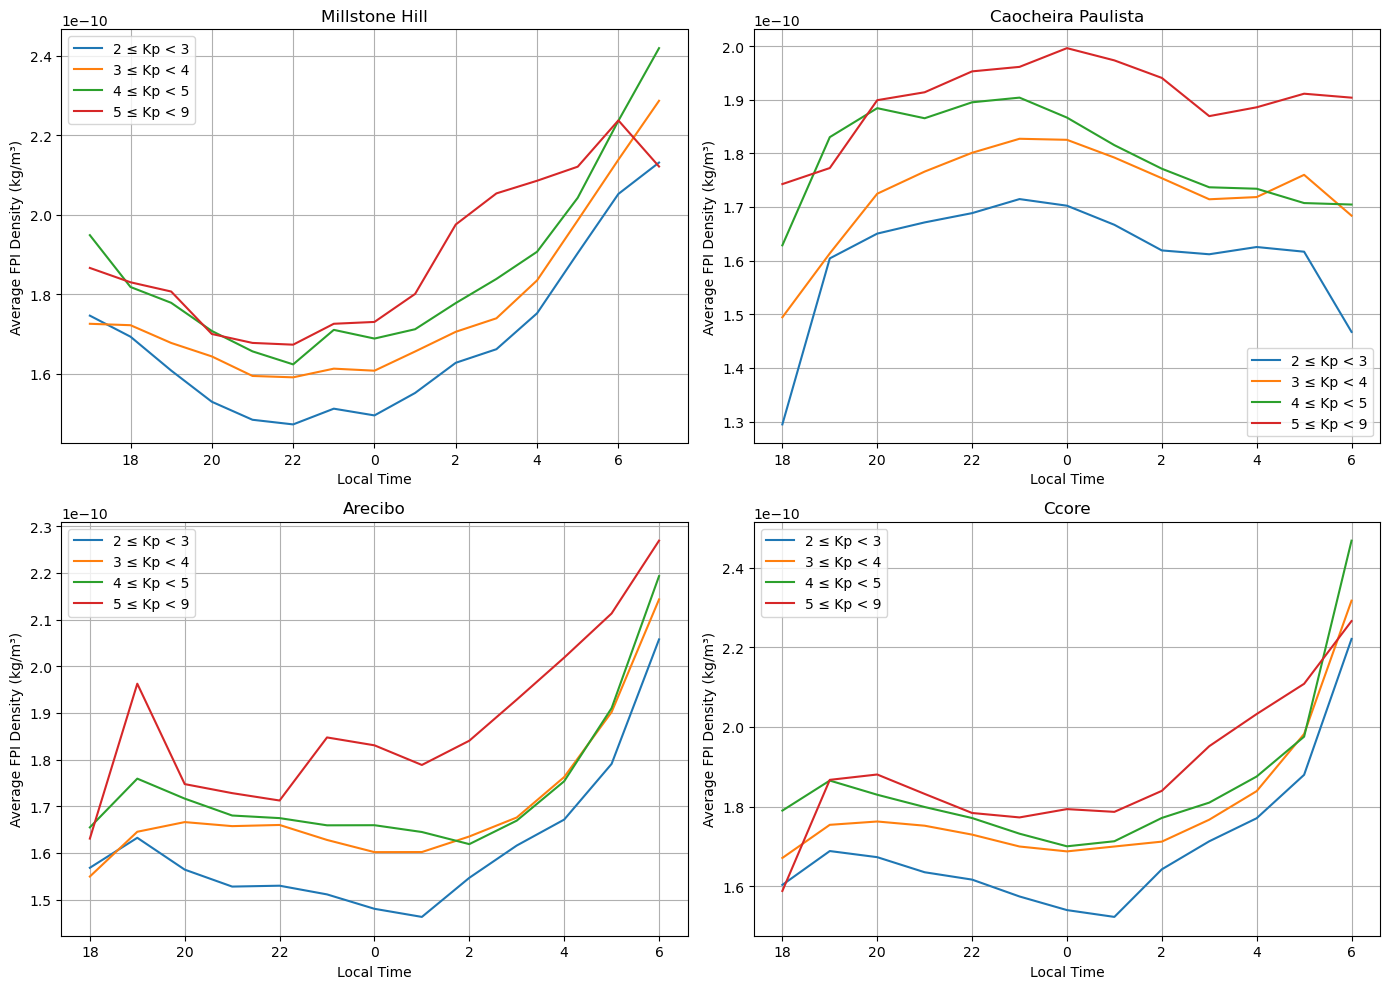

In [12]:
densities_plot['hour_local'] = densities_plot['hour_local'].apply(lambda x: x - 24 if x > 16 else x)
densities_plot = densities_plot[densities_plot['year'] >= 2021]

unique_sites = densities_plot['site_name'].unique()
kp_ranges = [(2, 3), (3, 4), (4, 5), (5,9)]  # Define KP ranges

# Set up the 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Loop through each unique site_name
for idx, site in enumerate(unique_sites):
    ax = axes[idx]
    site_data = densities_plot[densities_plot['site_name'] == site]
    
    # Loop through each KP range
    for kp_min, kp_max in kp_ranges:
        kp_data = site_data[(site_data['kp'] >= kp_min) & (site_data['kp'] < kp_max)]
        
        # Calculate the hourly average of fpi_density
        hourly_avg = kp_data.groupby('hour_local')['msis_mass_density'].mean()
        
        # Plot the hourly average
        ax.plot(hourly_avg.index, hourly_avg.values, label=f'{kp_min} ≤ Kp < {kp_max}')
    
    # Configure the plot
    ax.set_title(f'{str(site).replace('_', ' ').title()}')
    ax.set_xlabel('Local Time')
    ax.set_ylabel('Average FPI Density (kg/m³)')
    xticklabels = [str(int(tick) + 24) if tick < 0 else str(int(tick)) for tick in ax.get_xticks()]
    ax.set_xticklabels(xticklabels, fontsize=10)
    ax.tick_params(axis='y', labelsize=10)

    ax.legend()
    ax.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
#plt.savefig('/Users/elliotdable/Documents/UCL/research/transfer_docs/transfer_report/plots/fpi_analysis/kp_density_by_site.png', dpi=1000)
plt.show()


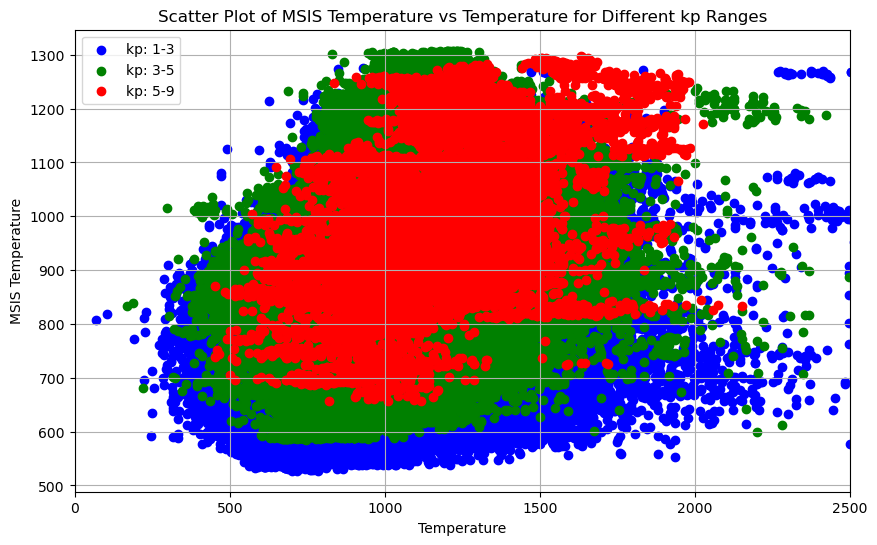

In [13]:
# Define the ranges for kp
range_1_3 = densities[(densities['kp'] >= 1) & (densities['kp'] < 3)]
range_3_5 = densities[(densities['kp'] >= 3) & (densities['kp'] < 5)]
range_5_9 = densities[(densities['kp'] >= 5) & (densities['kp'] <= 9)]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each range with different colors
plt.scatter(range_1_3['temperature'], range_1_3['msis_temperature'], color='blue', label='kp: 1-3')
plt.scatter(range_3_5['temperature'], range_3_5['msis_temperature'], color='green', label='kp: 3-5')
plt.scatter(range_5_9['temperature'], range_5_9['msis_temperature'], color='red', label='kp: 5-9')

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('MSIS Temperature')
plt.title('Scatter Plot of MSIS Temperature vs Temperature for Different kp Ranges')

plt.xlim(0,2500)

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

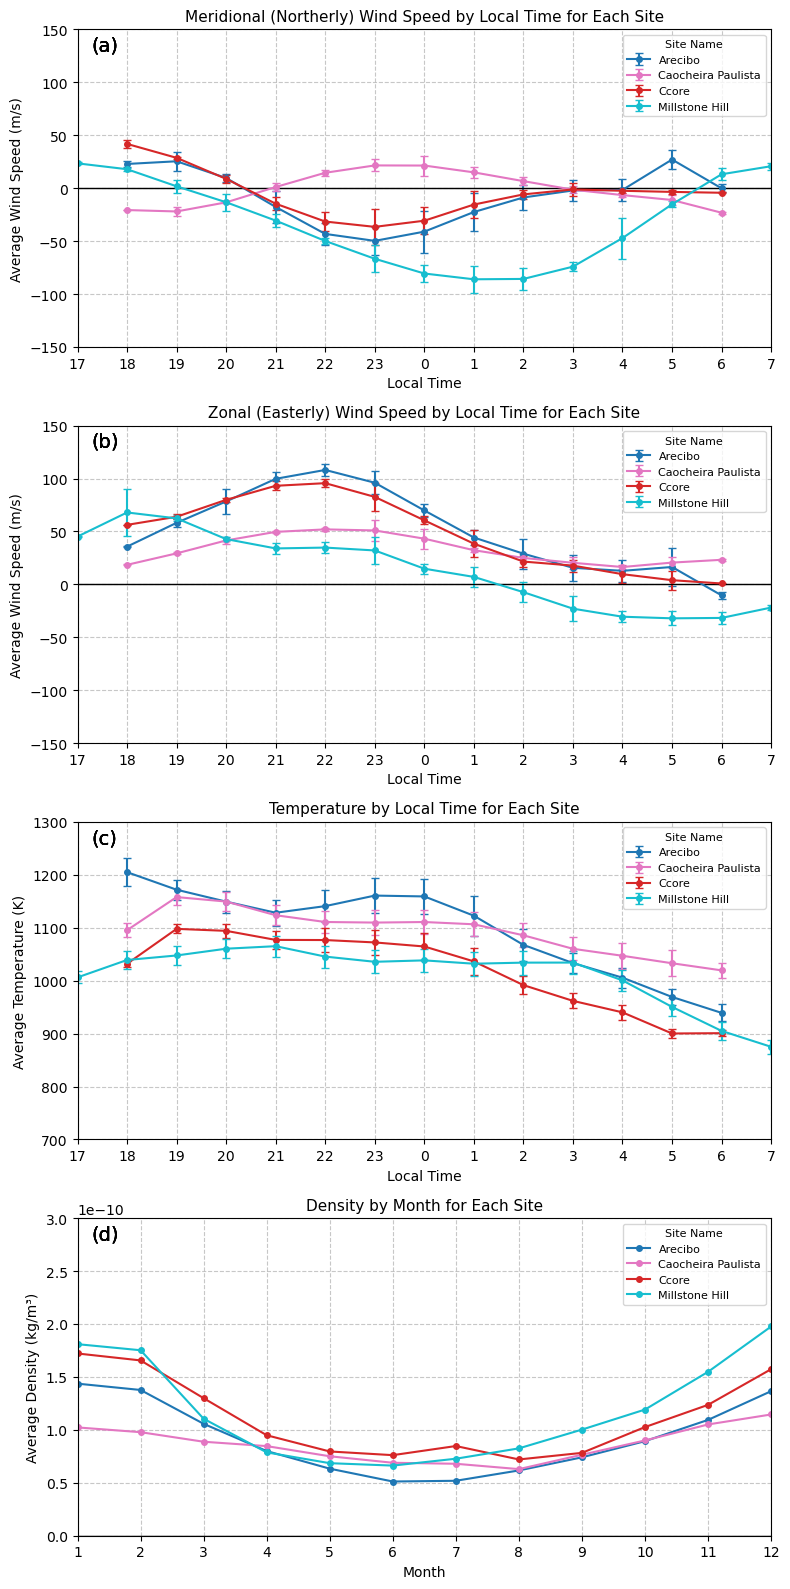

In [14]:
# Define a list of subplot labels
subplot_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']

# Create subplots without shared x-axis
fig, axes = plt.subplots(4, 1, figsize=(8, 16), sharex=False)  # Single-column layout for `(a), (c), (e), (h)`

# Define font sizes
title_fontsize = 11
label_fontsize = 10
tick_fontsize = 10
legend_fontsize = 8

# Create a color map for site names
all_sites = list(set(
    grouped_hour_local_meridional['site_name'].unique().tolist()
))
colors = plt.cm.tab10(np.linspace(0, 1, len(all_sites)))
color_map = dict(zip(all_sites, colors))

# Loop through the desired rows for meridional winds, zonal winds, temperatures, and density
for i, (grouped, title_prefix, y_label, ylim, label) in enumerate([
    (grouped_hour_local_meridional, 'Meridional (Northerly) Wind Speed', 'Average Wind Speed (m/s)', (-150, 150), '(a)'),
    (grouped_hour_local_zonal, 'Zonal (Easterly) Wind Speed', 'Average Wind Speed (m/s)', (-150, 150), '(b)'),
    (grouped_hour_local_temp, 'Temperature', 'Average Temperature (K)', (700, 1300), '(c)'),
    (grouped_month_density, 'Density', 'Average Density (kg/m³)', (0, 3e-10), '(d)')  # Adjust y-axis limits for density
]):
    ax = axes[i]  # Corresponding axis

    # Plot data for each site
    for site in sorted(grouped['site_name'].unique()):
        site_data = grouped[grouped['site_name'] == site]
        
        # Skip error bars for density row
        if label == '(d)':  # Last row (density)
            ax.errorbar(site_data['month'], site_data.iloc[:, 2], 
                        label=str(site).replace('_', ' ').title(), fmt='-o', 
                        capsize=3, markersize=4, color=color_map[site])
            
            # Set titles, labels, and limits
            ax.set_title(f'{title_prefix} by Month for Each Site', fontsize=title_fontsize)
            ax.set_xlabel('Month', fontsize=label_fontsize)
            ax.set_ylabel(y_label, fontsize=label_fontsize)
            ax.grid(True, linestyle='--', alpha=0.7)
            ax.axhline(y=0, color='black', linewidth=0.8, linestyle='-')
            ax.set_ylim(*ylim)
            
            # Add subplot label
            ax.text(0.02, 0.98, label, transform=ax.transAxes,
                    fontsize=14, va='top', ha='left', zorder=10)

            # Adjust x-ticks to have an interval of 1
            ax.set_xticks(np.arange(min(grouped.month.value_counts().keys()), 
                                    max(grouped.month.value_counts().keys()) + 1, 1))
            ax.tick_params(axis='y', labelsize=tick_fontsize)

            # Add a legend
            ax.legend(title='Site Name', fontsize=legend_fontsize, title_fontsize=legend_fontsize)
            ax.set_xlim(1,12)
        else:
            ax.errorbar(site_data['hour_local'], site_data.iloc[:, 2], 
                        yerr=site_data.iloc[:, 4], label=str(site).replace('_', ' ').title(), fmt='-o', 
                        capsize=3, markersize=4, color=color_map[site])

            # Set titles, labels, and limits
            ax.set_title(f'{title_prefix} by Local Time for Each Site', fontsize=title_fontsize)
            ax.set_xlabel('Local Time', fontsize=label_fontsize)
            ax.set_ylabel(y_label, fontsize=label_fontsize)
            ax.grid(True, linestyle='--', alpha=0.7)
            ax.axhline(y=0, color='black', linewidth=0.8, linestyle='-')
            ax.set_ylim(*ylim)
            
            # Add subplot label
            ax.text(0.02, 0.98, label, transform=ax.transAxes,
                    fontsize=14, va='top', ha='left', zorder=10)

            # Adjust x-ticks to have an interval of 1
            ax.set_xticks(np.arange(min(grouped.hour_local.value_counts().keys()), 
                                    max(grouped.hour_local.value_counts().keys()) + 1, 1))
            xticklabels = [str(int(tick) + 24) if tick < 0 else str(int(tick)) for tick in ax.get_xticks()]
            ax.set_xticklabels(xticklabels, fontsize=tick_fontsize)
            ax.tick_params(axis='y', labelsize=tick_fontsize)

            # Add a legend
            ax.legend(title='Site Name', fontsize=legend_fontsize, title_fontsize=legend_fontsize)
            ax.set_xlim(-7,7)

# Adjust layout to avoid overlap
plt.tight_layout()

plt.savefig('/Users/elliotdable/Documents/UCL/research/transfer_docs/transfer_report/plots/fpi_analysis/winds_temps_densities_americas_2021_2023.png', dpi=1000)

# Show the plot
plt.show()
